In [26]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [28]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [29]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [31]:
base.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [32]:
X = base.iloc[:,[1,25]].values

In [33]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [36]:
X.shape

(30000, 2)

In [37]:
X.T.shape

(2, 30000)

In [51]:
!pip install scikit-fuzzy
import skfuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [53]:
r

(array([[ 0.74968338,  2.01627962],
        [-0.7388943 , -0.30174364],
        [ 0.9753394 , -0.42055849]]),
 array([[0.02592726, 0.02732634, 0.00499073, ..., 0.01491968, 0.01406336,
         0.00906578],
        [0.91181773, 0.84864539, 0.97914361, ..., 0.95010681, 0.95612817,
         0.97292069],
        [0.06225501, 0.12402827, 0.01586565, ..., 0.03497351, 0.02980847,
         0.01801354]]),
 array([[0.58895137, 0.87967088, 0.53602783, ..., 0.34317586, 0.15178697,
         0.31648723],
        [0.40221076, 0.07756118, 0.02111449, ..., 0.03767177, 0.38879584,
         0.27580526],
        [0.00883787, 0.04276794, 0.44285767, ..., 0.61915237, 0.45941719,
         0.40770751]]),
 array([[3.29942624, 2.90505014, 2.8041029 , ..., 3.11978912, 2.47540996,
         2.68882498],
        [0.55636878, 0.5212922 , 0.20019484, ..., 0.39094781, 0.30021587,
         0.25955315],
        [2.12926458, 1.36359062, 1.57270435, ..., 2.03767716, 1.70028566,
         1.90750425]]),
 array([25710.581776

In [54]:
previsoes_porcentagem = r[1]

In [55]:
previsoes_porcentagem.shape

(3, 30000)

In [56]:
previsoes_porcentagem

array([[0.02592726, 0.02732634, 0.00499073, ..., 0.01491968, 0.01406336,
        0.00906578],
       [0.91181773, 0.84864539, 0.97914361, ..., 0.95010681, 0.95612817,
        0.97292069],
       [0.06225501, 0.12402827, 0.01586565, ..., 0.03497351, 0.02980847,
        0.01801354]])

In [57]:
previsoes_porcentagem[0][0]

0.025927263676590165

In [58]:
previsoes_porcentagem[1][0]

0.9118177308057981

In [59]:
previsoes_porcentagem[2][0]

0.062255005517611706

In [60]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [61]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [62]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
previsoes[5000]

1

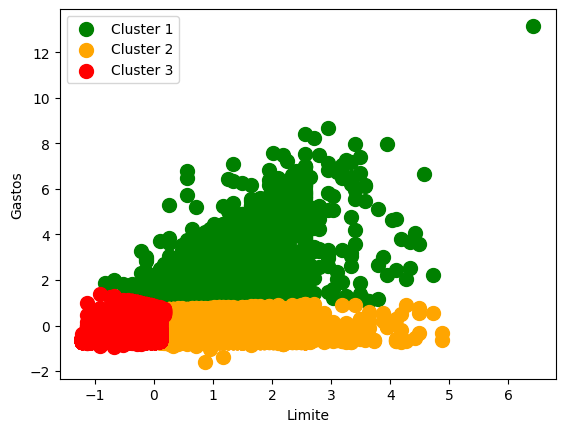

In [67]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'red', label = 'Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();